In [30]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures
from sklearn.tree import DecisionTreeRegressor
from sklearn import tree

In [31]:
kc_house = pd.read_csv('C:/Users/pitee/Downloads/archive (8)/kc_house_data.csv')

In [32]:
kc_house.head()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,20141013T000000,221900.0,3,1.00,1180,5650,1.0,0,0,3,7,1180.0,0,1955,0,98178,47.5112,-122.257,1340,5650
1,6414100192,20141209T000000,538000.0,3,2.25,2570,7242,2.0,0,0,3,7,2170.0,400,1951,1991,98125,47.7210,-122.319,1690,7639
2,5631500400,20150225T000000,180000.0,2,1.00,770,10000,1.0,0,0,3,6,770.0,0,1933,0,98028,47.7379,-122.233,2720,8062
3,2487200875,20141209T000000,604000.0,4,3.00,1960,5000,1.0,0,0,5,7,1050.0,910,1965,0,98136,47.5208,-122.393,1360,5000
4,1954400510,20150218T000000,510000.0,3,2.00,1680,8080,1.0,0,0,3,8,1680.0,0,1987,0,98074,47.6168,-122.045,1800,7503


In [33]:
print(kc_house)

               id             date     price  bedrooms  bathrooms  \
0      7129300520  20141013T000000  221900.0         3       1.00   
1      6414100192  20141209T000000  538000.0         3       2.25   
2      5631500400  20150225T000000  180000.0         2       1.00   
3      2487200875  20141209T000000  604000.0         4       3.00   
4      1954400510  20150218T000000  510000.0         3       2.00   
...           ...              ...       ...       ...        ...   
21608   263000018  20140521T000000  360000.0         3       2.50   
21609  6600060120  20150223T000000  400000.0         4       2.50   
21610  1523300141  20140623T000000  402101.0         2       0.75   
21611   291310100  20150116T000000  400000.0         3       2.50   
21612  1523300157  20141015T000000  325000.0         2       0.75   

       sqft_living  sqft_lot  floors  waterfront  view  condition  grade  \
0             1180      5650     1.0           0     0          3      7   
1             2570 

In [34]:
kc_house.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21613 entries, 0 to 21612
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   id             21613 non-null  int64  
 1   date           21613 non-null  object 
 2   price          21613 non-null  float64
 3   bedrooms       21613 non-null  int64  
 4   bathrooms      21613 non-null  float64
 5   sqft_living    21613 non-null  int64  
 6   sqft_lot       21613 non-null  int64  
 7   floors         21613 non-null  float64
 8   waterfront     21613 non-null  int64  
 9   view           21613 non-null  int64  
 10  condition      21613 non-null  int64  
 11  grade          21613 non-null  int64  
 12  sqft_above     21611 non-null  float64
 13  sqft_basement  21613 non-null  int64  
 14  yr_built       21613 non-null  int64  
 15  yr_renovated   21613 non-null  int64  
 16  zipcode        21613 non-null  int64  
 17  lat            21613 non-null  float64
 18  long  

In [35]:
pd.set_option('display.max_columns', None)

In [36]:
kc_house.head()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,20141013T000000,221900.0,3,1.00,1180,5650,1.0,0,0,3,7,1180.0,0,1955,0,98178,47.5112,-122.257,1340,5650
1,6414100192,20141209T000000,538000.0,3,2.25,2570,7242,2.0,0,0,3,7,2170.0,400,1951,1991,98125,47.7210,-122.319,1690,7639
2,5631500400,20150225T000000,180000.0,2,1.00,770,10000,1.0,0,0,3,6,770.0,0,1933,0,98028,47.7379,-122.233,2720,8062
3,2487200875,20141209T000000,604000.0,4,3.00,1960,5000,1.0,0,0,5,7,1050.0,910,1965,0,98136,47.5208,-122.393,1360,5000
4,1954400510,20150218T000000,510000.0,3,2.00,1680,8080,1.0,0,0,3,8,1680.0,0,1987,0,98074,47.6168,-122.045,1800,7503


<Axes: xlabel='price', ylabel='Count'>

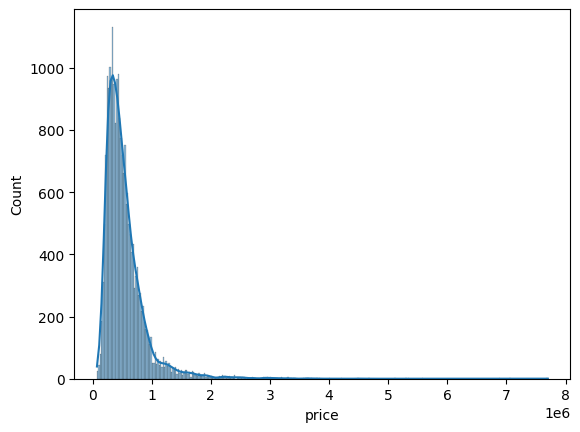

In [37]:
#sprawdz rozkład zmiennej 'price'
sns.histplot(kc_house['price'], kde=True)


In [38]:
# sprawdź, ile sypialni mają budynki
kc_house['bedrooms'].value_counts()

3     9824
4     6882
2     2760
5     1601
6      272
1      199
7       38
0       13
8       13
9        6
10       3
11       1
33       1
Name: bedrooms, dtype: int64

In [39]:
# usuń domy z odstającą liczbą sypialni
kc_house[(kc_house['bedrooms'] > 1) & (kc_house['bedrooms'] < 10) ]

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,20141013T000000,221900.0,3,1.00,1180,5650,1.0,0,0,3,7,1180.0,0,1955,0,98178,47.5112,-122.257,1340,5650
1,6414100192,20141209T000000,538000.0,3,2.25,2570,7242,2.0,0,0,3,7,2170.0,400,1951,1991,98125,47.7210,-122.319,1690,7639
2,5631500400,20150225T000000,180000.0,2,1.00,770,10000,1.0,0,0,3,6,770.0,0,1933,0,98028,47.7379,-122.233,2720,8062
3,2487200875,20141209T000000,604000.0,4,3.00,1960,5000,1.0,0,0,5,7,1050.0,910,1965,0,98136,47.5208,-122.393,1360,5000
4,1954400510,20150218T000000,510000.0,3,2.00,1680,8080,1.0,0,0,3,8,1680.0,0,1987,0,98074,47.6168,-122.045,1800,7503
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21608,263000018,20140521T000000,360000.0,3,2.50,1530,1131,3.0,0,0,3,8,1530.0,0,2009,0,98103,47.6993,-122.346,1530,1509
21609,6600060120,20150223T000000,400000.0,4,2.50,2310,5813,2.0,0,0,3,8,2310.0,0,2014,0,98146,47.5107,-122.362,1830,7200
21610,1523300141,20140623T000000,402101.0,2,0.75,1020,1350,2.0,0,0,3,7,1020.0,0,2009,0,98144,47.5944,-122.299,1020,2007
21611,291310100,20150116T000000,400000.0,3,2.50,1600,2388,2.0,0,0,3,8,1600.0,0,2004,0,98027,47.5345,-122.069,1410,1287


In [40]:
kc_house['bathrooms']

0        1.00
1        2.25
2        1.00
3        3.00
4        2.00
         ... 
21608    2.50
21609    2.50
21610    0.75
21611    2.50
21612    0.75
Name: bathrooms, Length: 21613, dtype: float64

In [41]:
# zmiana ilości łazienek na liczby naturalne z zaokrągleniem powyżej 0
kc_house['bathrooms'] = np.ceil(kc_house['bathrooms'])

In [42]:
# sprawdź liczbę łazienek w budynkach
kc_house['bathrooms'].value_counts()

3.0    9365
2.0    6433
1.0    3928
4.0    1611
5.0     223
6.0      33
0.0      10
7.0       6
8.0       4
Name: bathrooms, dtype: int64

In [43]:
# sprawdź, czy rok renowacji budynku był zawsze późniejszy niż rok budowy domu
sprawdzenie = kc_house['yr_renovated'] > kc_house['yr_built']
print(sprawdzenie.all())

False


In [44]:
kc_house['yr_built'].value_counts()

2014    559
2006    454
2005    450
2004    433
2003    422
       ... 
1933     30
1901     29
1902     27
1935     24
1934     21
Name: yr_built, Length: 116, dtype: int64

In [45]:
kc_house['yr_renovated'].value_counts()

0       20699
2014       91
2013       37
2003       36
2005       35
        ...  
1951        1
1959        1
1948        1
1954        1
1944        1
Name: yr_renovated, Length: 70, dtype: int64

In [46]:
kc_house['yr_built'].value_counts()

2014    559
2006    454
2005    450
2004    433
2003    422
       ... 
1933     30
1901     29
1902     27
1935     24
1934     21
Name: yr_built, Length: 116, dtype: int64

In [47]:
kc_house['yr_renovated'].value_counts()

0       20699
2014       91
2013       37
2003       36
2005       35
        ...  
1951        1
1959        1
1948        1
1954        1
1944        1
Name: yr_renovated, Length: 70, dtype: int64

In [48]:
kc_house[(kc_house['yr_renovated'] > 1)]

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
1,6414100192,20141209T000000,538000.0,3,3.0,2570,7242,2.0,0,0,3,7,2170.0,400,1951,1991,98125,47.7210,-122.319,1690,7639
35,9547205180,20140613T000000,696000.0,3,3.0,2300,3060,1.5,0,0,3,8,1510.0,790,1930,2002,98115,47.6827,-122.310,1590,3264
95,1483300570,20140908T000000,905000.0,4,3.0,3300,10250,1.0,0,0,3,7,2390.0,910,1946,1991,98040,47.5873,-122.249,1950,6045
103,2450000295,20141007T000000,1088000.0,3,3.0,2920,8113,2.0,0,0,3,8,2920.0,0,1950,2010,98004,47.5814,-122.196,2370,8113
115,3626039325,20141121T000000,740500.0,3,4.0,4380,6350,2.0,0,0,3,8,2780.0,1600,1900,1999,98117,47.6981,-122.368,1830,6350
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19622,7351200295,20150114T000000,1150000.0,3,2.0,1760,6788,2.0,1,4,3,7,1760.0,0,1940,1960,98125,47.7336,-122.284,1630,7588
20057,126039256,20140904T000000,434900.0,3,2.0,1520,5040,2.0,0,0,3,7,1520.0,0,1977,2006,98177,47.7770,-122.362,1860,8710
20444,4305600360,20150225T000000,500012.0,4,3.0,2400,9612,1.0,0,0,3,8,1230.0,1170,1962,2009,98059,47.4799,-122.127,2430,5539
20447,3319500628,20150212T000000,356999.0,3,2.0,1010,1546,2.0,0,0,3,8,1010.0,0,1971,2014,98144,47.5998,-122.311,1010,1517


In [49]:
sprawdzenie = kc_house['yr_renovated'] > kc_house['yr_built']
print(sprawdzenie.all())

False


In [50]:
'yr_renovated' > 'yr_built'

True

In [51]:
kc_house['yr_renovated'] > kc_house['yr_built']

0        False
1         True
2        False
3        False
4        False
         ...  
21608    False
21609    False
21610    False
21611    False
21612    False
Length: 21613, dtype: bool

In [52]:
# sprawdź rozkład cen domów w zależności od ich kondycji
#kc_house.groupby('condition')['price'].median()
grouped = kc_house.groupby(['condition', 'price']).max()
grouped

id             date  bedrooms  bathrooms  \
condition price                                                         
1         78000.0      40000362  20140506T000000         2        1.0   
          81000.0    3028200080  20150324T000000         2        1.0   
          105500.0   2023049218  20140716T000000         2        1.0   
          125000.0   3501100050  20141210T000000         3        1.0   
          130000.0   9272202260  20140924T000000         3        1.0   
...                         ...              ...       ...        ...   
5         3000000.0  3761100045  20140618T000000         4        5.0   
          3065000.0  1732800780  20150212T000000         5        3.0   
          3200000.0  7159200005  20140507T000000         7        5.0   
          3300000.0  1346300150  20141020T000000         8        4.0   
          3650000.0  4217402115  20150421T000000         6        5.0   

                     sqft_living  sqft_lot  floors  waterfront  view  grade  \
condition price                                                               
1         78000.0            780     16344     1.0           0     0      5   
          81000.0            730      9975     1.0           0     0      5   
          105500.0           930      7740     1.0           0     0      5   
          125000.0          1230      7440     1.5           0     0      6   
          130000.0          1200      7000     2.0           0     0      7   
...                          ...       ...     ...         ...   ...    ...   
5         3000000.0         4850     12445     2.0           1     4     10   
          3065000.0         4150      7500     2.5           0     4     11   
          3200000.0         6210      8856     2.5           0     2     11   
          3300000.0         7710     11750     3.5           0     0     12   
          3650000.0         5480     19401     1.5           1     4     11   

                     sqft_above  sqft_basement  yr_built  yr_renovated  \
condition price                                                          
1         78000.0         780.0              0      1942             0   
          81000.0         730.0              0      1943             0   
          105500.0        930.0              0      1932             0   
          125000.0       1230.0              0      1928             0   
          130000.0       1200.0              0      1908             0   
...                         ...            ...       ...           ...   
5         3000000.0      3850.0           1000      1989             0   
          3065000.0      3510.0            640      1909             0   
          3200000.0      4760.0           1450      1910             0   
          3300000.0      6090.0           1620      1904             0   
          3650000.0      3910.0           1570      1936             0   

                     zipcode      lat     long  sqft_living15  sqft_lot15  
condition price                                                            
1         78000.0      98168  47.4739 -122.280           1700       10387  
          81000.0      98168  47.4808 -122.315            860        9000  
          105500.0     98148  47.4611 -122.324           1620        8584  
          125000.0     98117  47.6941 -122.362           1350        7440  
          130000.0     98116  47.5883 -122.384           3290        6000  
...                      ...      ...      ...            ...         ...  
5         3000000.0    98034  47.7011 -122.244           3350       12210  
          3065000.0    98119  47.6303 -122.362           2250        4050  
          3200000.0    98109  47.6307 -122.354           2940        5400  
          3300000.0    98112  47.6263 -122.314           4210        8325  
          3650000.0    98105  47.6515 -122.277           3510       15810  

[5996 rows x 19 columns]

In [53]:
grouped

id             date  bedrooms  bathrooms  \
condition price                                                         
1         78000.0      40000362  20140506T000000         2        1.0   
          81000.0    3028200080  20150324T000000         2        1.0   
          105500.0   2023049218  20140716T000000         2        1.0   
          125000.0   3501100050  20141210T000000         3        1.0   
          130000.0   9272202260  20140924T000000         3        1.0   
...                         ...              ...       ...        ...   
5         3000000.0  3761100045  20140618T000000         4        5.0   
          3065000.0  1732800780  20150212T000000         5        3.0   
          3200000.0  7159200005  20140507T000000         7        5.0   
          3300000.0  1346300150  20141020T000000         8        4.0   
          3650000.0  4217402115  20150421T000000         6        5.0   

                     sqft_living  sqft_lot  floors  waterfront  view  grade  \
condition price                                                               
1         78000.0            780     16344     1.0           0     0      5   
          81000.0            730      9975     1.0           0     0      5   
          105500.0           930      7740     1.0           0     0      5   
          125000.0          1230      7440     1.5           0     0      6   
          130000.0          1200      7000     2.0           0     0      7   
...                          ...       ...     ...         ...   ...    ...   
5         3000000.0         4850     12445     2.0           1     4     10   
          3065000.0         4150      7500     2.5           0     4     11   
          3200000.0         6210      8856     2.5           0     2     11   
          3300000.0         7710     11750     3.5           0     0     12   
          3650000.0         5480     19401     1.5           1     4     11   

                     sqft_above  sqft_basement  yr_built  yr_renovated  \
condition price                                                          
1         78000.0         780.0              0      1942             0   
          81000.0         730.0              0      1943             0   
          105500.0        930.0              0      1932             0   
          125000.0       1230.0              0      1928             0   
          130000.0       1200.0              0      1908             0   
...                         ...            ...       ...           ...   
5         3000000.0      3850.0           1000      1989             0   
          3065000.0      3510.0            640      1909             0   
          3200000.0      4760.0           1450      1910             0   
          3300000.0      6090.0           1620      1904             0   
          3650000.0      3910.0           1570      1936             0   

                     zipcode      lat     long  sqft_living15  sqft_lot15  
condition price                                                            
1         78000.0      98168  47.4739 -122.280           1700       10387  
          81000.0      98168  47.4808 -122.315            860        9000  
          105500.0     98148  47.4611 -122.324           1620        8584  
          125000.0     98117  47.6941 -122.362           1350        7440  
          130000.0     98116  47.5883 -122.384           3290        6000  
...                      ...      ...      ...            ...         ...  
5         3000000.0    98034  47.7011 -122.244           3350       12210  
          3065000.0    98119  47.6303 -122.362           2250        4050  
          3200000.0    98109  47.6307 -122.354           2940        5400  
          3300000.0    98112  47.6263 -122.314           4210        8325  
          3650000.0    98105  47.6515 -122.277           3510       15810  

[5996 rows x 19 columns]

In [54]:
# porównaj rok budowy domu z jego kondycją
kc_house[['yr_built','condition']]

,yr_built,condition
0,1955,3
1,1951,3
2,1933,3
3,1965,5
4,1987,3
...,...,...
21608,2009,3
21609,2014,3
21610,2009,3
21611,2004,3


In [55]:
# sprawdź korelację między zmiennymi
correlation_matrix = kc_house.corr()

# Wyświetlenie macierzy korelacji
print(correlation_matrix)

                     id     price  bedrooms  bathrooms  sqft_living  sqft_lot  \
id             1.000000 -0.016762  0.001286   0.008434    -0.012258 -0.132109   
price         -0.016762  1.000000  0.308350   0.491863     0.702035  0.089661   
bedrooms       0.001286  0.308350  1.000000   0.490999     0.576671  0.031703   
bathrooms      0.008434  0.491863  0.490999   1.000000     0.726683  0.078833   
sqft_living   -0.012258  0.702035  0.576671   0.726683     1.000000  0.172826   
sqft_lot      -0.132109  0.089661  0.031703   0.078833     0.172826  1.000000   
floors         0.018525  0.256794  0.175429   0.527996     0.353949 -0.005201   
waterfront    -0.002721  0.266369 -0.006582   0.058137     0.103818  0.021604   
view           0.011592  0.397293  0.079532   0.171384     0.284611  0.074710   
condition     -0.023783  0.036362  0.028472  -0.135352    -0.058753 -0.008958   
grade          0.008130  0.667434  0.356967   0.664095     0.762704  0.113621   
sqft_above    -0.010830  0.6

C:\Users\pitee\AppData\Local\Temp\ipykernel_12996\991154035.py:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  correlation_matrix = kc_house.corr()


In [58]:
kc_house = kc_house.rename(columns={'sqft_living': 'size'})

In [59]:
X = kc_house[['size', 'condition']]
y = kc_house['price']

In [60]:
from sklearn.model_selection import train_test_split

In [61]:
from sklearn.linear_model import LinearRegression

In [62]:
from sklearn.metrics import r2_score

In [63]:
X1 = X[:1800]
y1 = y[:1800]

In [25]:
# wytrenuj model regresji liniowej na zbiorze treningowym

In [67]:
X_train1, X_test1, y_train1, y_test1 = train_test_split(X, y, test_size=0.3, random_state = 123)

C:\Users\pitee\AppData\Roaming\Python\Python311\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


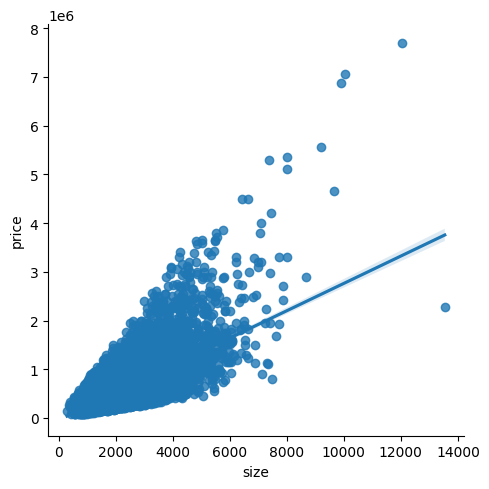

In [68]:
sns.lmplot(x = 'size', y= 'price', data=kc_house)

In [69]:
X_train1.head()

,size,condition
19792,1370,3
8177,2290,4
15993,2570,4
18564,1220,3
3143,1920,5


In [70]:
X_train1.shape

(15129, 2)

In [71]:
X_test1.shape

(6484, 2)

In [72]:
model1 = LinearRegression()
model1.fit(X_train1, y_train1)

LinearRegression()

In [73]:
model1.coef_

array([  280.53801135, 45536.76929227])

In [74]:
model1.intercept_

-198653.91708879743

y = -198653 + 280*Size + 45536*Condition

In [75]:
y_pred = model1.predict(X)

In [76]:
pd.DataFrame({'actual':y, 'predictions':y_pred})

,actual,predictions
0,221900.0,268991.244179
1,538000.0,658939.079952
2,180000.0,153970.659526
3,604000.0,578884.431614
4,510000.0,409260.249852
...,...,...
21608,360000.0,367179.548150
21609,400000.0,585999.197002
21610,402101.0,224105.162363
21611,400000.0,386817.208945


In [77]:
# zrób predykcje na zbiorze testowym
y_pred = model1.predict(X_test1)

In [78]:
X = kc_house[['size', 'condition']]
y = kc_house['price']

In [79]:
r2_score(y_test1, y_pred)

0.5143393549677662

In [ ]:
X_train2, X_test2, y_train2, y_test2 = train_test_split(X1, y1, test_size=0.2, random_state=123)

In [ ]:
model2 = LinearRegression()
model2.fit(X_train2, y_train2)

In [82]:
y_pred2 = model2.predict(X_train2)

In [83]:
r2_score(y_train2, y_pred2)

0.46289275063753677

In [89]:
model2 = LinearRegression()
model2.fit(X_test2, y_test2)

LinearRegression()

In [90]:
r2_score(y_train2, y_pred2)

0.46289275063753677

In [92]:
X_train3, X_test3, y_train3, y_test3 = train_test_split(X, y, test_size=0.1, random_state=123)

In [93]:
model3 = LinearRegression()
model3.fit(X_train3, y_train3)

LinearRegression()

In [94]:
y_pred3 = model3.predict(X_test3)

In [95]:
r2_score(y_test3, y_pred3)

0.5320318466364988

In [96]:
from sklearn.metrics import mean_squared_error

In [97]:
# oblicz metrykę MSE
# MSE dla pierwszego modelu
mean_squared_error(y_test1, y_pred)

65952527938.3409

In [98]:
# MSE dla trzeciego modelu

In [99]:
mean_squared_error(y_test3, y_pred3)

70585300395.38249

In [100]:
# Drzewo decyzyjne
from sklearn.tree import DecisionTreeRegressor

In [101]:
X = kc_house[['size', 'condition']]
y = kc_house['price']

In [102]:
model1 = DecisionTreeRegressor()

In [103]:
model1.fit(X_train1, y_train1)

DecisionTreeRegressor()

In [104]:
model1.get_depth()

22

In [105]:
model1.get_n_leaves()

1670

In [106]:
from sklearn import tree

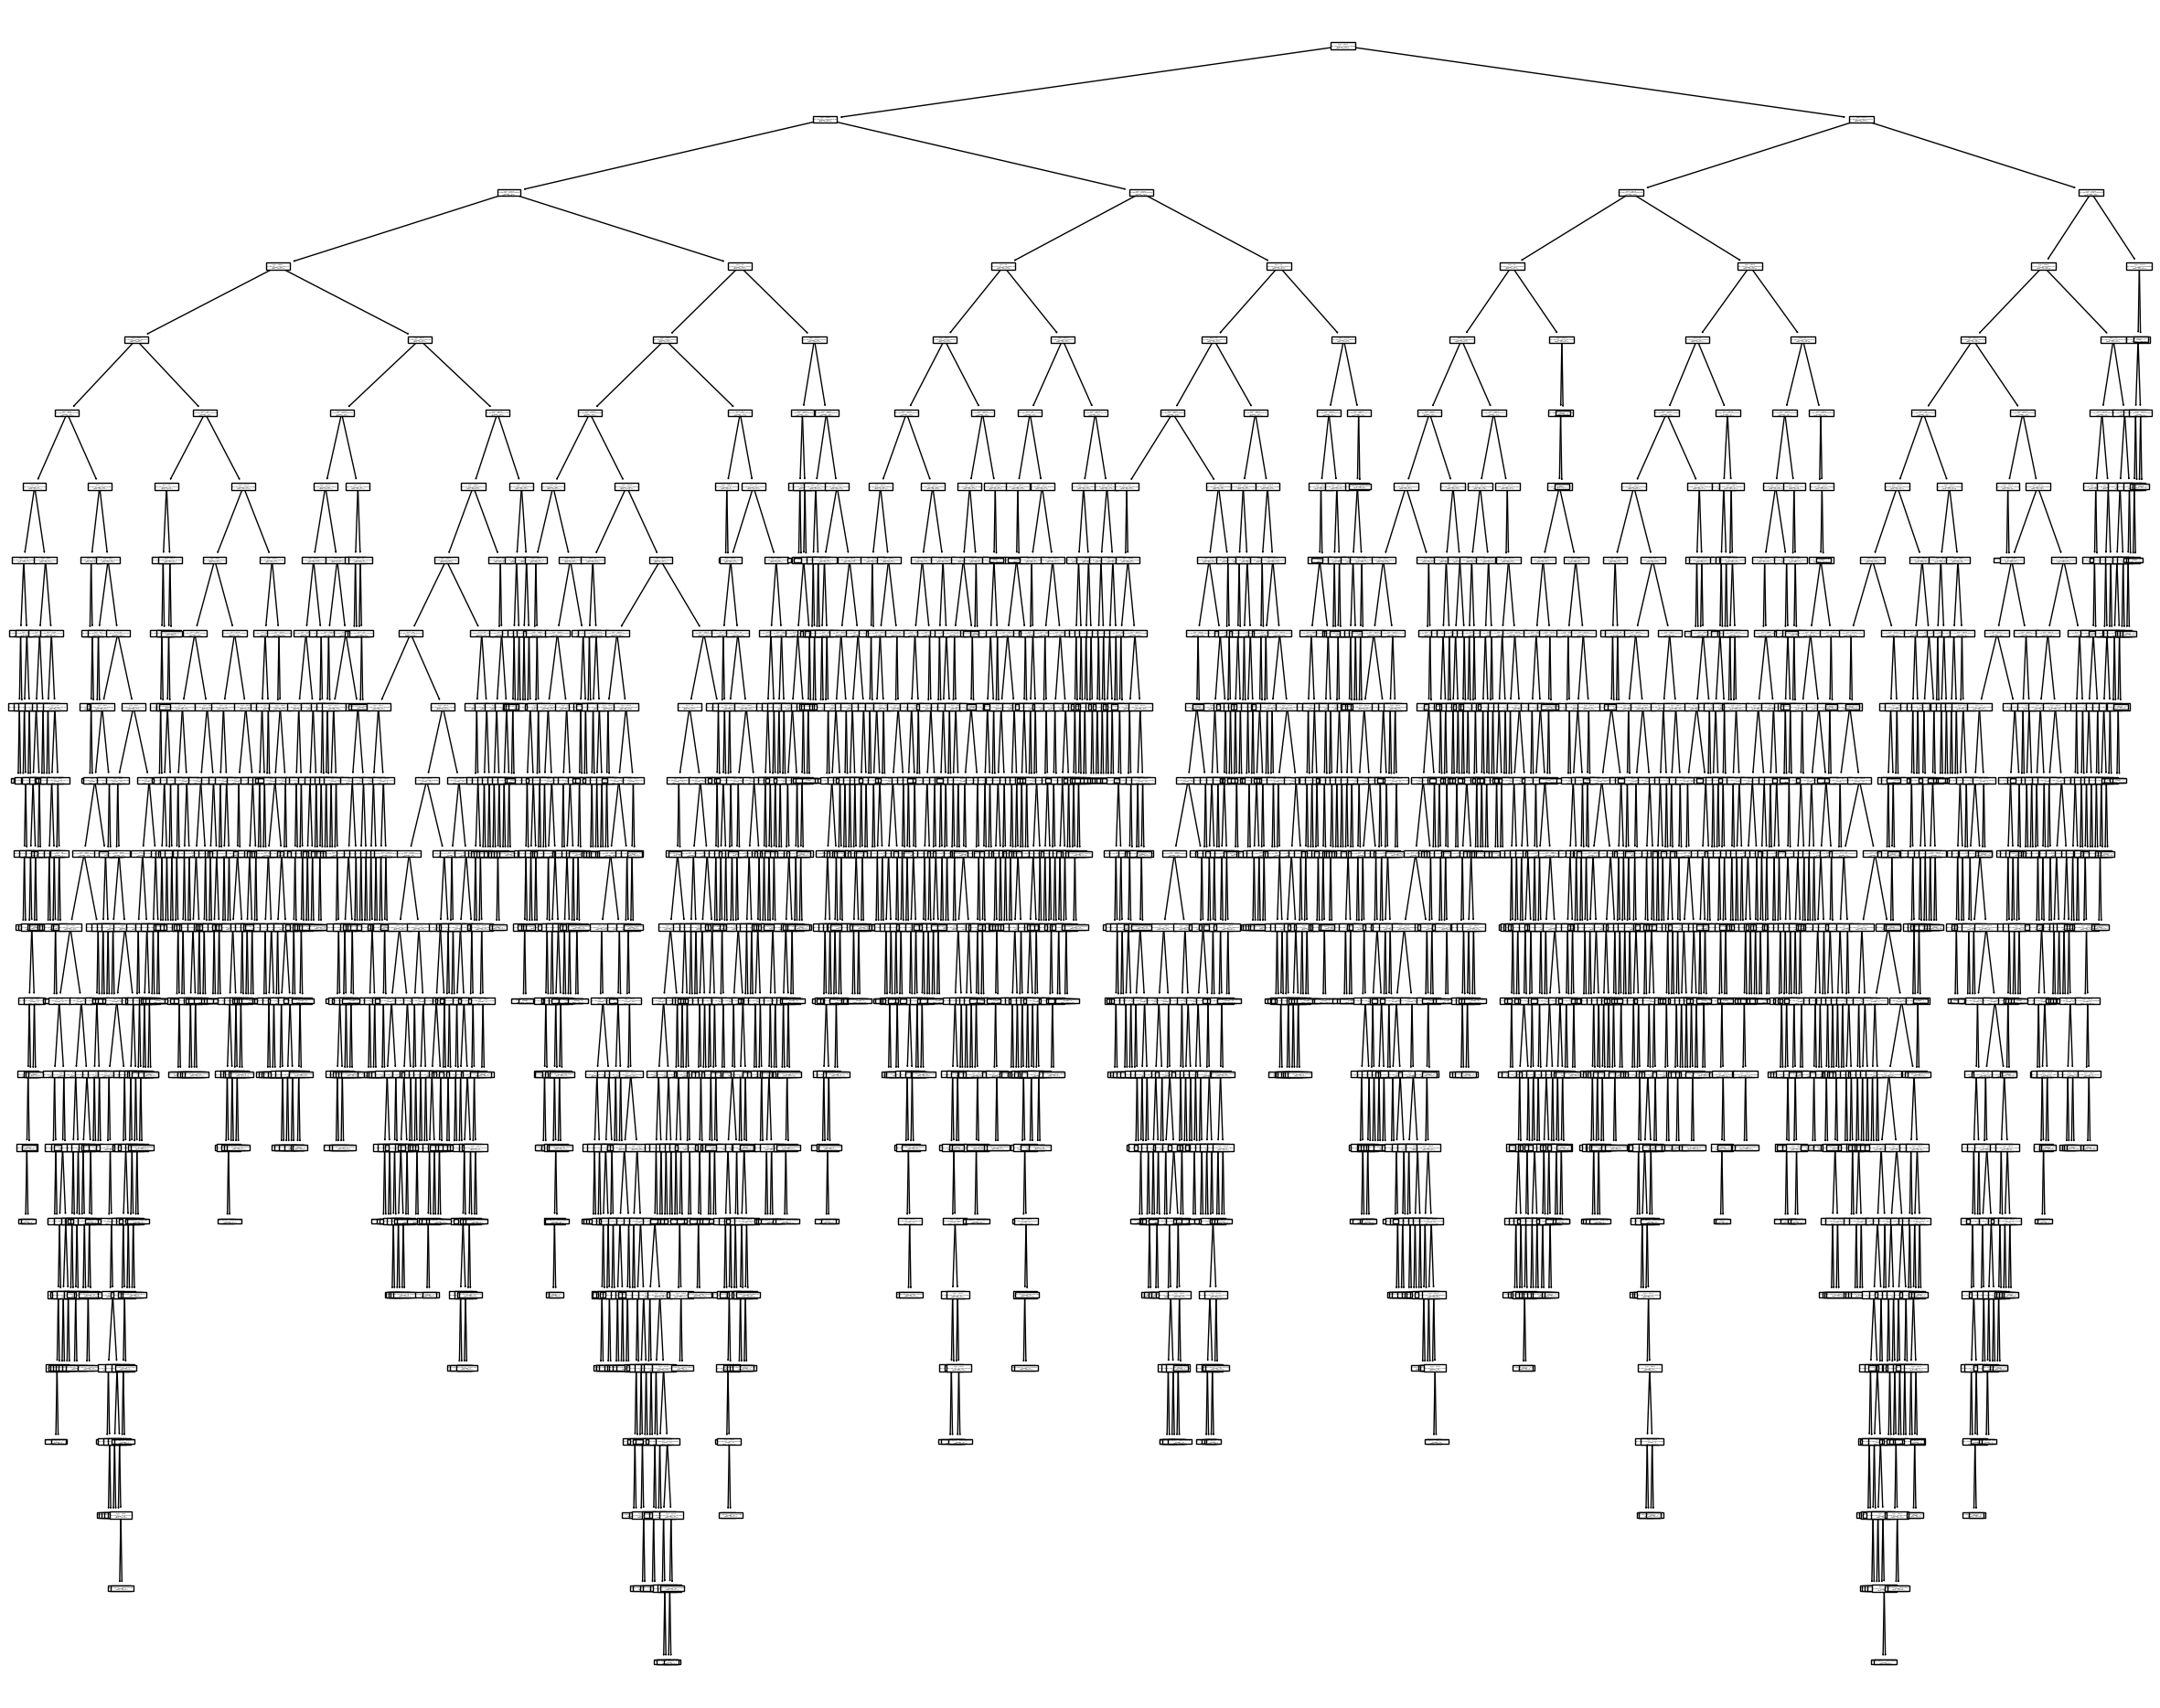

In [107]:
fig, ax = plt.subplots(figsize=(30,24))
ax = tree.plot_tree(model1)
plt.show()

[Text(0.6237133494325326, 0.9782608695652174, 'x[0] <= 2847.5\nsquared_error = 134334775188.686\nsamples = 15129\nvalue = 539183.682'),
 Text(0.38006487075864276, 0.9347826086956522, 'x[0] <= 2009.5\nsquared_error = 40552965673.724\nsamples = 12513\nvalue = 446461.138'),
 Text(0.23132580997347724, 0.8913043478260869, 'x[0] <= 1435.0\nsquared_error = 24153627186.63\nsamples = 8199\nvalue = 386585.162'),
 Text(0.1227022647247119, 0.8478260869565217, 'x[0] <= 1089.0\nsquared_error = 17565673602.974\nsamples = 3870\nvalue = 340977.497'),
 Text(0.05603650310956649, 0.8043478260869565, 'x[0] <= 875.0\nsquared_error = 14540265867.473\nsamples = 1509\nvalue = 308286.7'),
 Text(0.023619558258642766, 0.7608695652173914, 'x[0] <= 625.0\nsquared_error = 10778620410.367\nsamples = 535\nvalue = 281757.944'),
 Text(0.008340954819828059, 0.717391304347826, 'x[1] <= 2.5\nsquared_error = 8247696111.111\nsamples = 45\nvalue = 230233.333'),
 Text(0.0032193158953722333, 0.6739130434782609, 'x[0] <= 420.0\n

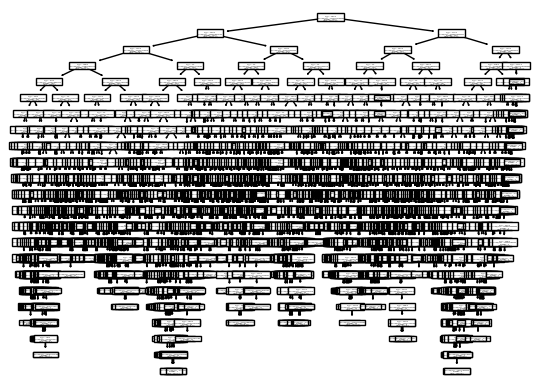

In [108]:
tree.plot_tree(model1)

In [109]:
model2 = DecisionTreeRegressor(max_depth=7)
model2.fit(X, y)

DecisionTreeRegressor(max_depth=7)

In [110]:
model2.get_n_leaves()

116

In [111]:
model2.get_depth()

7

In [112]:
model2.predict(X_test2)

array([ 429653.03370787,  412876.27513966, 1867588.33333333,
       1047630.        ,  324400.54819277,  875966.2972973 ,
        745254.30524345,  471558.97350993,  427192.75047801,
        597240.13333333,  448605.50209205,  526879.93866375,
        368084.90102389,  427192.75047801,  523677.54226475,
        654025.15753425,  412876.27513966,  626845.90967742,
        448605.50209205,  368084.90102389,  448812.51079137,
        654025.15753425,  631516.60095012,  550727.22044088,
        626845.90967742,  448812.51079137,  427192.75047801,
        523677.54226475,  412876.27513966,  368084.90102389,
       1003533.89893617,  597240.13333333,  523677.54226475,
        928261.21886792,  368084.90102389,  412876.27513966,
        353014.81830791,  412876.27513966, 1003533.89893617,
       1662452.34782609,  448605.50209205,  368084.90102389,
        324400.54819277, 1344199.39666667,  388840.57005604,
        928261.21886792,  490380.22580645,  993450.        ,
        368084.90102389,

[Text(0.5406944444444445, 0.9375, 'x[0] <= 3406.0\nsquared_error = 134776142225.572\nsamples = 21613\nvalue = 540088.142'),
 Text(0.2827777777777778, 0.8125, 'x[0] <= 2259.5\nsquared_error = 56403191076.308\nsamples = 19839\nvalue = 479005.296'),
 Text(0.14222222222222222, 0.6875, 'x[0] <= 1529.0\nsquared_error = 28808468812.385\nsamples = 14031\nvalue = 405675.701'),
 Text(0.07111111111111111, 0.5625, 'x[0] <= 1104.0\nsquared_error = 18724852481.476\nsamples = 6553\nvalue = 348152.158'),
 Text(0.035555555555555556, 0.4375, 'x[0] <= 847.0\nsquared_error = 14869949767.599\nsamples = 2281\nvalue = 306851.529'),
 Text(0.017777777777777778, 0.3125, 'x[0] <= 605.0\nsquared_error = 10840592669.19\nsamples = 654\nvalue = 274710.049'),
 Text(0.008888888888888889, 0.1875, 'x[0] <= 555.0\nsquared_error = 8029448422.592\nsamples = 57\nvalue = 226938.596'),
 Text(0.0044444444444444444, 0.0625, 'squared_error = 7668117428.834\nsamples = 33\nvalue = 244062.121'),
 Text(0.013333333333333334, 0.0625, 

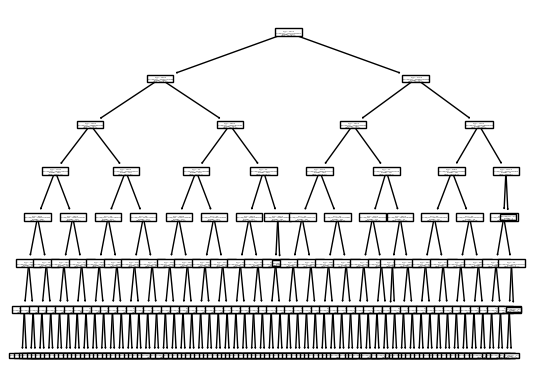

In [113]:
tree.plot_tree(model2)

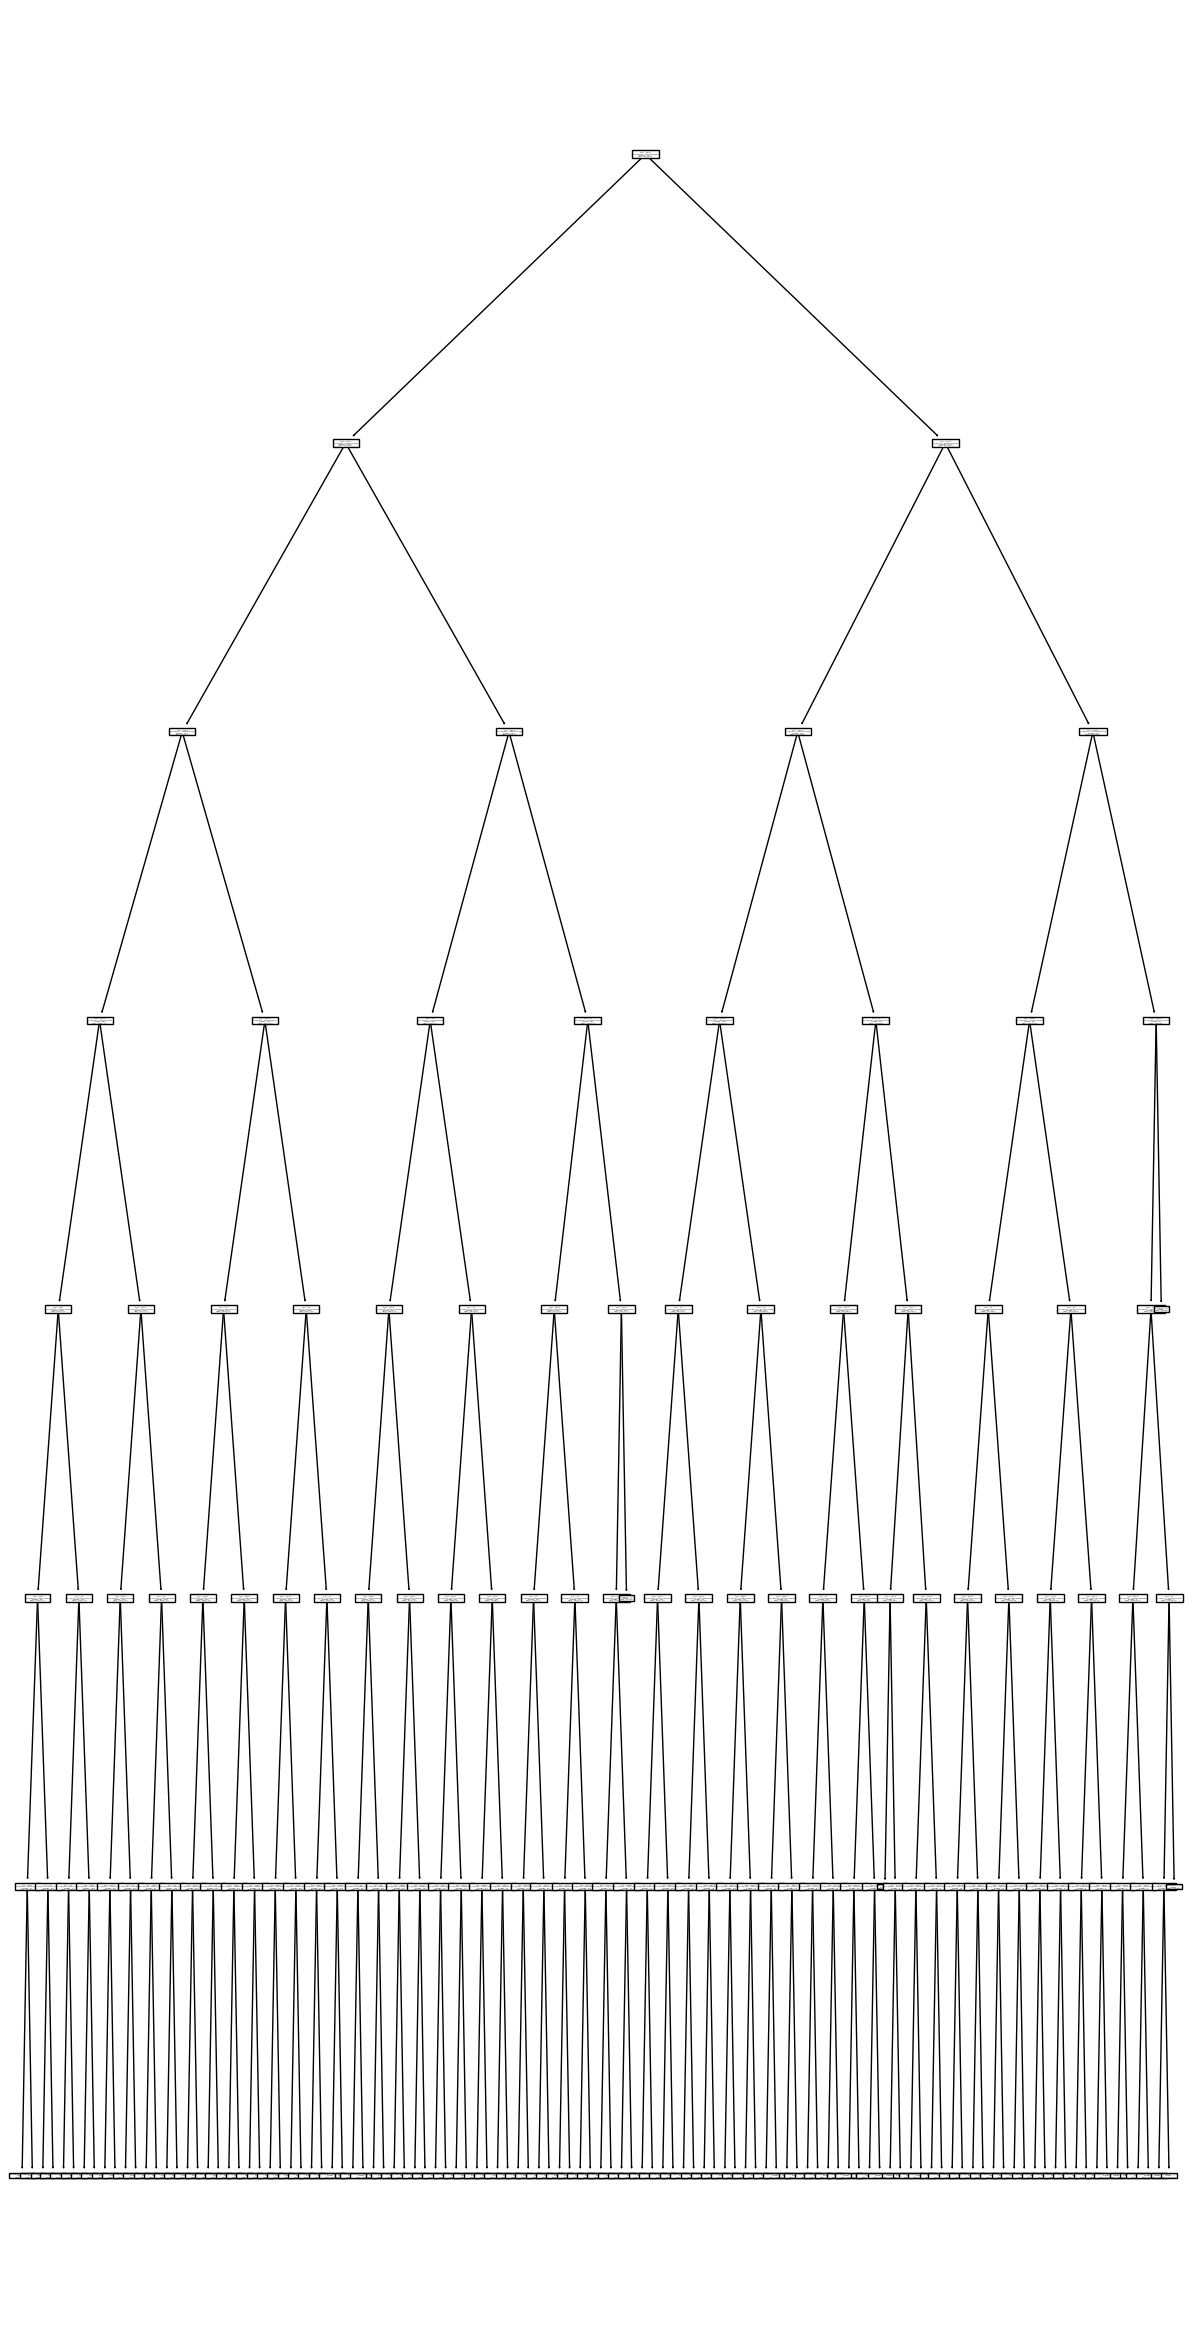

In [114]:
fig, ax = plt.subplots(figsize=(15,30))
ax = tree.plot_tree(model2)
plt.show()

In [115]:
model3 = DecisionTreeRegressor(min_samples_leaf=3)
model3.fit(X_train3, y_train3)

DecisionTreeRegressor(min_samples_leaf=3)

In [116]:
model3.get_depth()

25

In [117]:
model3.get_n_leaves()

1117

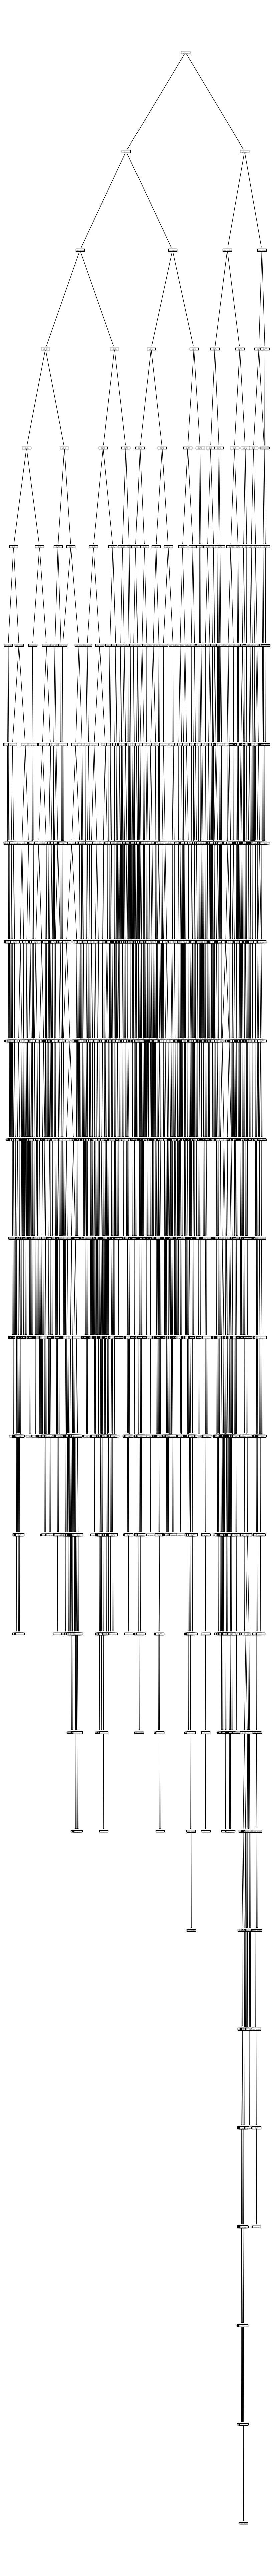

In [118]:
fig, ax = plt.subplots(figsize=(10,100))
ax = tree.plot_tree(model3)
plt.show()

In [119]:
from sklearn.model_selection import KFold

In [120]:
cv = KFold(n_splits=5, shuffle = True, random_state = 123)

In [121]:
for train, test in cv.split(X1,y1):
  X_train1, y_train1 = X.iloc[train], y.iloc[train]
  X_test1, y_test1 = X.iloc[test], y.iloc[test]
  model = LinearRegression()
  model.fit(X_train1, y_train1)
  y_pred = model.predict(X_test1)
  print('Współczynnik R2: ', r2_score(y_test1, y_pred))

Współczynnik R2:  0.5232341805248558
Współczynnik R2:  0.44398130363496235
Współczynnik R2:  0.41972596877043855
Współczynnik R2:  0.5417624068559761
Współczynnik R2:  0.329174357874496


In [127]:
from sklearn.model_selection import LeaveOneOut
from sklearn.metrics import mean_absolute_percentage_error


cv = LeaveOneOut()

for train, test in cv.split(X, y):
    X_train2, y_train2 = X.iloc[train], y.iloc[train]
    X_test2, y_test2 = X.iloc[test], y.iloc[test]
    
    model2 = LinearRegression()
    model2.fit(X_train2, y_train2)
    y_pred2 = model2.predict(X_test2)
    
    mape = mean_absolute_percentage_error(y_test2, y_pred2)
    print('Wartość MAPE: ', mape)

Wartość MAPE:  0.20741714450737675
Wartość MAPE:  0.22776765395627058
Wartość MAPE:  0.15494123795541753
Wartość MAPE:  0.046199076346513185
Wartość MAPE:  0.19776591847594646
Wartość MAPE:  0.19647322686822896
Wartość MAPE:  0.6273577732792002
Wartość MAPE:  0.19815278323301502
Wartość MAPE:  0.9059123984140898
Wartość MAPE:  0.4503769833049171
Wartość MAPE:  0.41918124586694855
Wartość MAPE:  0.3457547400871163
Wartość MAPE:  0.23379653686145357
Wartość MAPE:  0.08620379790344566
Wartość MAPE:  0.1587548943653518
Wartość MAPE:  0.18134428535410704
Wartość MAPE:  0.18599219385184276
Wartość MAPE:  0.11241001912992803
Wartość MAPE:  0.6800053981373924
Wartość MAPE:  0.4419126322701654
Wartość MAPE:  0.13283152961739605
Wartość MAPE:  0.6020144774356031
Wartość MAPE:  1.0203968342728806
Wartość MAPE:  0.0627268254057201
Wartość MAPE:  1.0383071821126244
Wartość MAPE:  1.1698731594293652
Wartość MAPE:  0.33125570821389333
Wartość MAPE:  0.37354297932878755
Wartość MAPE:  0.16906776726683